<a href="https://colab.research.google.com/github/mehtab123-4/Ai-Lab/blob/main/Movies_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


✅ Original shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


100%|██████████| 50000/50000 [00:08<00:00, 5802.02it/s]


🧹 Cleaned shape: (49580, 3)

📊 Word count stats:


,word_count
count,49580.000000
mean,229.345280
std,170.133292
min,4.000000
25%,125.000000
50%,172.000000
75%,278.000000
max,2460.000000


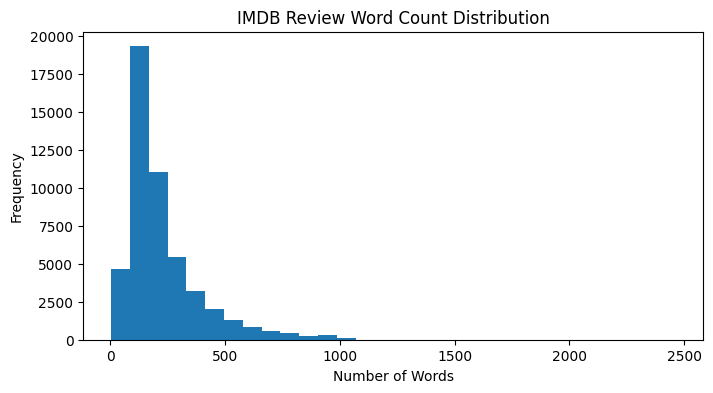


🧩 Random Cleaned Reviews:


,review,clean_review,sentiment,word_count
42226,"This film is terrible, and don't blame Jesus F...",this film is terrible and dont blame jesus fra...,negative,510
34104,"A friend of mine once rented this, thinking si...",a friend of mine once rented this thinking sin...,negative,212
44743,Like watching a neighbor's summer camp home mo...,like watching a neighbors summer camp home mov...,negative,108
36102,See No Evil is the first film from WWE films. ...,see no evil is the first film from wwe films y...,positive,343
48337,I want to state first that I am a Christian (a...,i want to state first that i am a christian an...,negative,237
45131,"With the little respect it deserves, I would l...",with the little respect it deserves i would li...,negative,141
22592,"Great actors, good filming, a potentially inte...",great actors good filming a potentially intere...,negative,255
23652,I was initially excited about this movie and f...,i was initially excited about this movie and f...,negative,128
8569,"This is actually a groovy-neat little flick, m...",this is actually a groovyneat little flick mad...,positive,178
43862,*The ELITE sniper team that has inserted 24h o...,the elite sniper team that has inserted h or s...,negative,131



✅ Cleaned file saved as cleaned_imdb.csv


In [ ]:
# ---------------- IMDB Cleaning + EDA ----------------
import pandas as pd
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
tqdm.pandas()

# Correct dataset path (use the one downloaded by kagglehub)
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

print("✅ Original shape:", df.shape)
display(df.head())

# Basic cleaning
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)              # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()             # collapse spaces
    return text

df["clean_review"] = df["review"].progress_apply(clean_text)

# Drop duplicates or missing values
df = df.dropna(subset=["clean_review"]).drop_duplicates(subset=["clean_review"])
print("🧹 Cleaned shape:", df.shape)

# Add word count column
df["word_count"] = df["clean_review"].apply(lambda x: len(x.split()))

# Show stats
print("\n📊 Word count stats:")
display(df["word_count"].describe())

# Plot histogram
plt.figure(figsize=(8,4))
plt.hist(df["word_count"], bins=30)
plt.title("IMDB Review Word Count Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Display random examples
print("\n🧩 Random Cleaned Reviews:")
display(df.sample(10)[["review", "clean_review", "sentiment", "word_count"]])

# Save cleaned file
df.to_csv("/content/cleaned_imdb.csv", index=False)
print("\n✅ Cleaned file saved as cleaned_imdb.csv")
